In [59]:
import numpy
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
top_skills_number = 5


<Axes: >

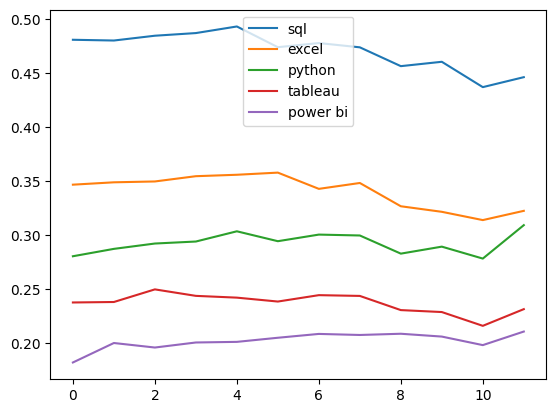

In [86]:

df['job_posted_month'] = df['job_posted_date'].dt.month
df['job_posted_month'].value_counts()
df_data_analyst = df[df['job_title_short'] == 'Data Analyst']
df_data_analyst_month_counts = df_data_analyst.groupby('job_posted_month').size().reset_index(name='job_count')
df_data_analyst = df_data_analyst.explode('job_skills')
df_data_analyst_pivot = df_data_analyst.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size')
df_data_analyst_pivot = df_data_analyst_pivot.merge(df_data_analyst_month_counts, on='job_posted_month')
top_skills = list(df_data_analyst['job_skills'].value_counts().head(top_skills_number).index)
df_data_analyst_pivot = df_data_analyst_pivot[top_skills + ['job_count']]
for skill in top_skills:
    df_data_analyst_pivot[skill] = df_data_analyst_pivot[skill] / df_data_analyst_pivot['job_count']
df_data_analyst_pivot[top_skills].plot(kind='line')